In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv('data/Crop_recommendation.csv')

labels = ['rice', 'blackgram', 'maize', 'watermelon', 'jute', 'cotton']

rice = data.loc[data.label == 'rice']
blackgram = data.loc[data.label == 'blackgram']
maize = data.loc[data.label == 'maize']
watermelon = data.loc[data.label == 'watermelon']
jute = data.loc[data.label == 'jute']
cotton = data.loc[data.label == 'cotton']
df = pd.concat([rice, blackgram, maize, watermelon, jute, cotton])

In [3]:
df.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1397,96,18,50,25.331045,84.305338,6.904242,41.532187,watermelon
10,91,53,40,26.527235,81.417538,5.386168,264.614870,rice
113,92,44,16,18.877514,65.768161,6.082974,94.761894,maize
1309,118,13,54,24.413119,89.815740,6.039585,44.078435,watermelon
1919,117,56,15,25.992374,77.054355,7.368258,89.118821,cotton
1900,133,47,24,24.402289,79.197320,7.231325,90.802236,cotton
1910,107,45,25,23.086593,83.555461,7.227746,71.840807,cotton
1948,122,40,17,24.964408,81.316776,6.854559,80.039958,cotton
1312,101,10,47,25.542169,83.318834,6.936998,57.573432,watermelon
174,76,39,24,24.254745,55.647099,6.995844,64.238455,maize


In [4]:
df.drop(labels=['rainfall'], axis=1, inplace=True)

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice


In [6]:
features = [col for col in df.columns if col not in ['label']]

print(features)
target = 'label'
print(target)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

['N', 'P', 'K', 'temperature', 'humidity', 'ph']
label


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((480, 6), (480,), (120, 6), (120,))

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_train_ = encoder.fit_transform(y_train)
y_test_ = encoder.transform(y_test)

In [9]:
encoder.classes_

array(['blackgram', 'cotton', 'jute', 'maize', 'rice', 'watermelon'],
      dtype=object)

In [14]:
model = xgb.XGBClassifier(random_state=1,use_label_encoder=False)

In [15]:
model.fit(X_train, y_train_, eval_metric='mlogloss',)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [16]:
y_train_preds = model.predict(X_train)

In [17]:
from sklearn import metrics

In [18]:
metrics.accuracy_score(y_train_, y_train_preds)

1.0

In [19]:
y_test_preds = model.predict(X_test)
metrics.accuracy_score(y_test_, y_test_preds)

0.9583333333333334

<Figure size 504x504 with 0 Axes>

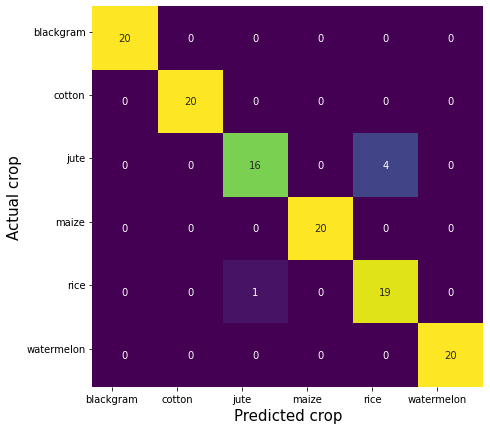

In [49]:
cm = metrics.confusion_matrix(y_test_, y_test_preds)
plt.figure(figsize=(7, 7))
_ = sns.heatmap(cm, annot=True, cbar=False, cmap='viridis')
_ = plt.xticks([i+0.3 for i in range(6)], encoder.classes_, rotation=0)
_ = plt.yticks([i+0.4 for i in range(6)], encoder.classes_, rotation=0)
_ = plt.xlabel("Predicted crop", fontsize=15)
_ = plt.ylabel("Actual crop", fontsize=15)

In [43]:
print(metrics.classification_report(y_test_, y_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.94      0.80      0.86        20
           3       1.00      1.00      1.00        20
           4       0.83      0.95      0.88        20
           5       1.00      1.00      1.00        20

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
import pickle

In [ ]:
X_train.iloc[0].tolist()

In [ ]:
X_train.columns

In [ ]:
def class_predict(x):
    out = encoder.inverse_transform(model.predict(np.array(x).reshape(1, -1)))[0]
    return out

In [ ]:
['N', 'P', 'K', 'temperature', 'humidity', 'ph']

class_predict([35.0, 72.0, 21.0, 34.03619494, 64.28791388, 7.741418772])

In [ ]:
encoder.inverse_transform([y_train_[0]])

In [ ]:
with open('crop_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
dict(zip(['N', 'P', 'K', 'temperature', 'humidity', 'ph'],[35.0, 72.0, 21.0, 34.03619494, 64.28791388, 7.741418772] ))